#####  Zonal Averaging using UXarray
- Open grid & data file
- Zonal Averaging
- Using layout to combine plots
 
Ming Ge May 2025

In [1]:
import numpy as np
import uxarray as ux

from holoviews import opts
import holoviews as hv
# Tell HoloViews (and hvplot) to use the Matplotlib backend for rendering plots
hv.extension( "matplotlib")

#### Read grid and data using uxarray

:Image   [x,y]   (x_y surface_pressure)
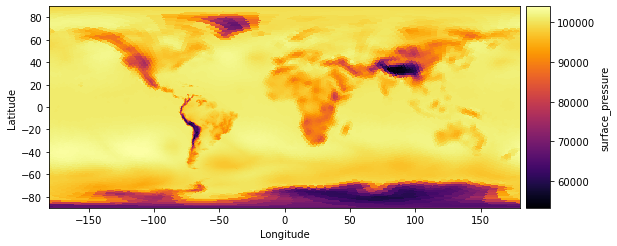

In [3]:
dir_data = '/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/'
flnm_grid = dir_data + 'SouthAmerica.static.nc' 
flnm_data = dir_data + 'history.2014-09-11_00.00.00.nc'
 
uxds = ux.open_dataset(flnm_grid, flnm_data)
uxds["surface_pressure"][0,:].plot(cmap="inferno", periodic_elements="split")

#### Zonal Averaging
The range of latitudes can be modified by using the lat parameter. It accepts:
- Single scalar: e.g., lat=45
- List/array: e.g., lat=[10, 20] or lat=np.array([10, 20])
- Tuple: e.g., (min_lat, max_lat, step)

:Overlay
   .Curve.I   :Curve   [latitudes]   (surface_pressure_zonal_mean)
   .Scatter.I :Scatter   [latitudes]   (surface_pressure_zonal_mean)
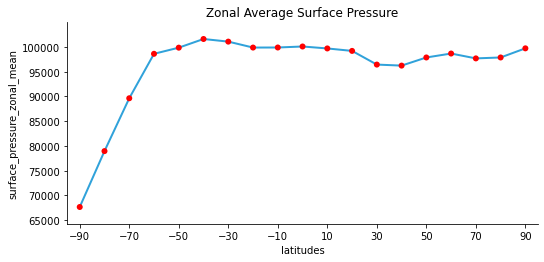

In [5]:
zonal_mean_psfc = uxds["surface_pressure"][0].zonal_mean(lat=(-90, 90, 10))

(zonal_mean_psfc.plot.line() * zonal_mean_psfc.plot.scatter(color="red")).opts(
    title="Zonal Average Surface Pressure", xticks=np.arange(-90, 100, 20), xlim=(-95, 95)
)

#### Using layout to combine plots
Note: using the Matplotlib backend, HoloViews has limited support for individual plot sizing in Layout.

:Layout
   .Image.I :Image   [x,y]   (x_y surface_pressure)
   .Curve.I :Curve   [surface_pressure_zonal_mean]   (latitudes)
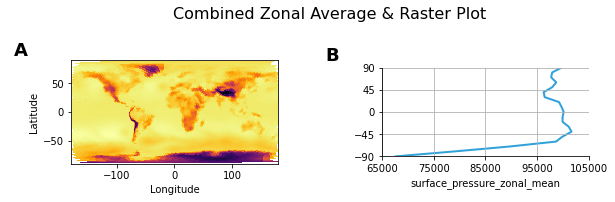

In [10]:
plot_1 = uxds["surface_pressure"][0].plot(
        cmap="inferno",
        height=150,
        width=300,
        colorbar=False,
        ylim=(-90, 90),
    )

plot_2 = zonal_mean_psfc.plot.line(
        x="surface_pressure_zonal_mean",
        y="latitudes",
        #height=300,
        #width=150,
        ylabel="",
        ylim=(-90, 90),
        xlim=(65000, 105000),
        xticks=[65000, 75000, 85000, 95000, 105000],
        yticks=[-90, -45, 0, 45, 90],
        grid=True,
    )

laylout = (plot_1 + plot_2)
laylout.opts(title="Combined Zonal Average & Raster Plot", aspect_weight=False).cols(2)

:Layout
   .Image.I :Image   [x,y]   (x_y surface_pressure)
   .Curve.I :Curve   [surface_pressure_zonal_mean]   (latitudes)


:Layout
   .Image.I :Image   [x,y]   (x_y surface_pressure)
   .Curve.I :Curve   [surface_pressure_zonal_mean]   (latitudes)
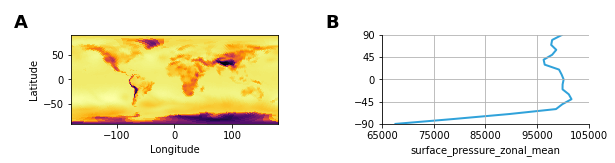

In [52]:
layout = (plot_1 + plot_2)
print(layout)
layout.opts(
    opts.Image(fig_inches=(2, 4)), opts.Curve(fig_inches=(4, 1))).cols(2)  